In [184]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

%matplotlib inline

Visualisaties: maak histogrammen (alle variabelen), boxplots van Age, Flight Distance, Departure Delay en
Arrival Delay

In [173]:
# Read data
df = pd.read_csv("Airlinesatisfaction.csv")
df.drop(['Unnamed: 0','id',], axis=1, inplace=True)
df.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [174]:
# Check for non numeric values in columns
for col in list(df.columns):
    values = df[col].unique()
    if type(values[0]) == str:
        print(f"Column {col} has string values [{values}]")

Column Gender has string values [['Male' 'Female']]
Column Customer Type has string values [['Loyal Customer' 'disloyal Customer']]
Column Type of Travel has string values [['Personal Travel' 'Business travel']]
Column Class has string values [['Eco Plus' 'Business' 'Eco']]
Column satisfaction has string values [['neutral or dissatisfied' 'satisfied']]


In [175]:
# Replace non numeric values
df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
df['Gender'].replace({'Male': 0, 'Female': 1}, inplace = True)
df['Customer Type'].replace({'disloyal Customer': 0, 'Loyal Customer': 1}, inplace = True)
df['Type of Travel'].replace({'Personal Travel': 0, 'Business travel': 1}, inplace = True)
df['Class'].replace({'Eco': 1, 'Eco Plus': 2, 'Business':3}, inplace = True)

<ipython-input-176-9ce4d4c584cd>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot((length/2),3,j+1)


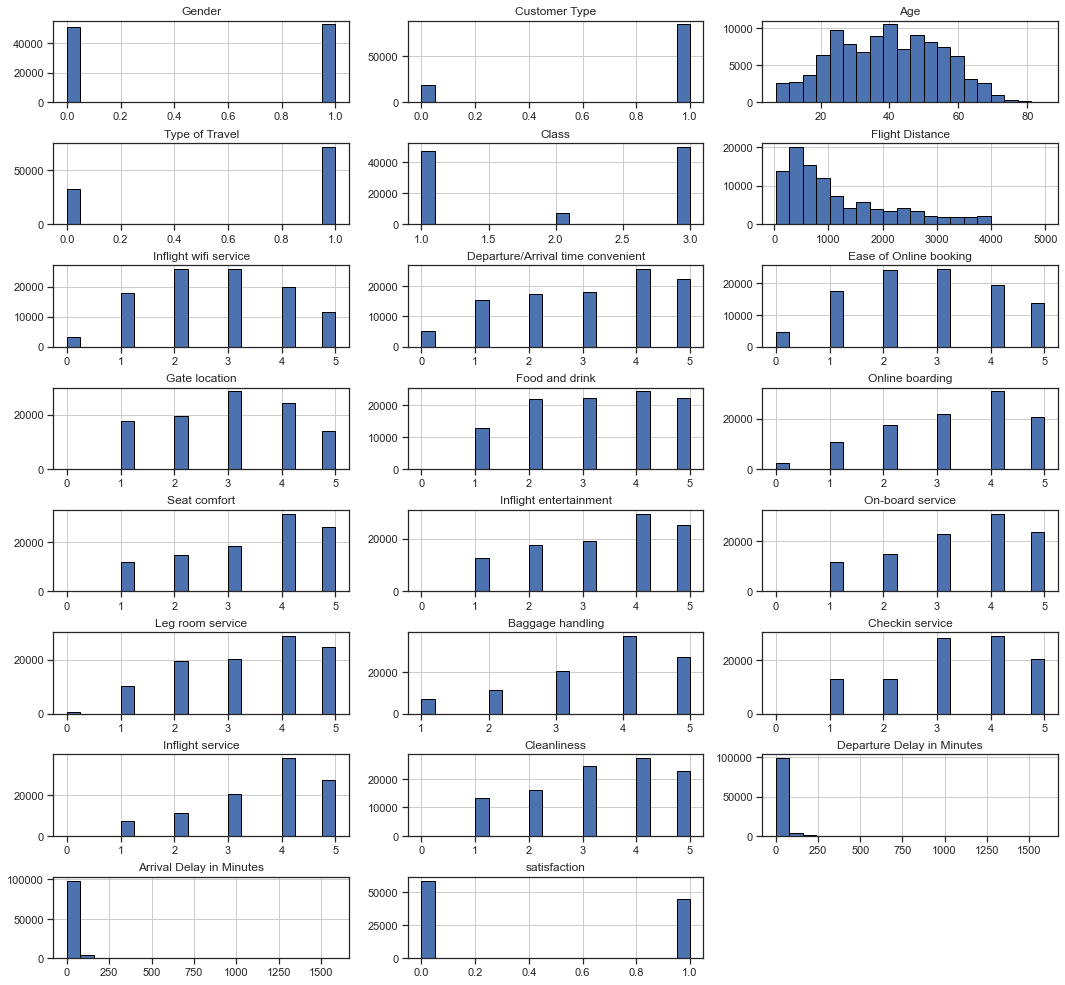

In [176]:
# Plot histograms
columns=df.columns[:23]
plt.subplots(figsize=(18,24))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    df[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

1. Correlaties tussen alle interval variabelen (geen heatmap)

In [188]:
corr_matrix = df.corr()
print(corr_matrix)

                                     Gender  Customer Type       Age  \
Gender                             1.000000      -0.031732 -0.008928   
Customer Type                     -0.031732       1.000000  0.281674   
Age                               -0.008928       0.281674  1.000000   
Type of Travel                     0.006909      -0.308333  0.048524   
Class                             -0.008253       0.105735  0.140565   
Flight Distance                   -0.005828       0.225200  0.099461   
Inflight wifi service             -0.008974       0.007543  0.017859   
Departure/Arrival time convenient -0.009142       0.206869  0.038125   
Ease of Online booking            -0.006951       0.019509  0.024842   
Gate location                     -0.000333      -0.006078 -0.001330   
Food and drink                    -0.005772       0.059454  0.023000   
Online boarding                    0.042260       0.189262  0.208939   
Seat comfort                       0.026502       0.159484  0.16

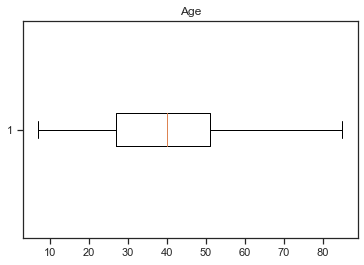

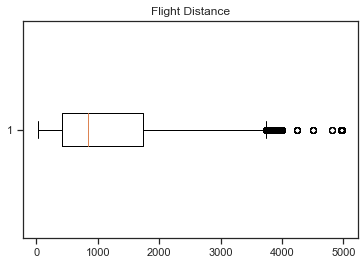

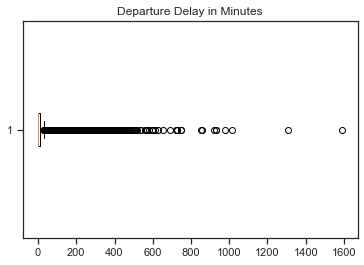

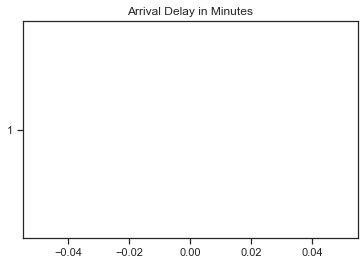

In [177]:
# Create a boxplot for 4 columns
box_set = df[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
for column in box_set:
    plt.figure()
    plt.boxplot(df[column], vert=False)
    plt.title(column)

Test normaalverdeling van Age, Flight Distance, Departure Delay en Arrival Delay

In [178]:
# Shapiro-Wilk test
for col in box_set:
    w, p = stats.shapiro(box_set[col])
    print(f"Column {col} has a W-statistic of {w} and a P of {p}")

Column Age has a W-statistic of 0.9884740710258484 and a P of 0.0
Column Flight Distance has a W-statistic of 0.8641189336776733 and a P of 0.0
Column Departure Delay in Minutes has a W-statistic of 0.4233558773994446 and a P of 0.0
Column Arrival Delay in Minutes has a W-statistic of nan and a P of 1.0


a:\software\coding projects\aai\aaivenv\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Transformeer naar z-scores

In [179]:
# Apply z-score
scaler = StandardScaler()
box_set = pd.DataFrame(scaler.fit_transform(box_set), columns=box_set.columns)

Maak een Heatmap met alle variabelen

<AxesSubplot:>

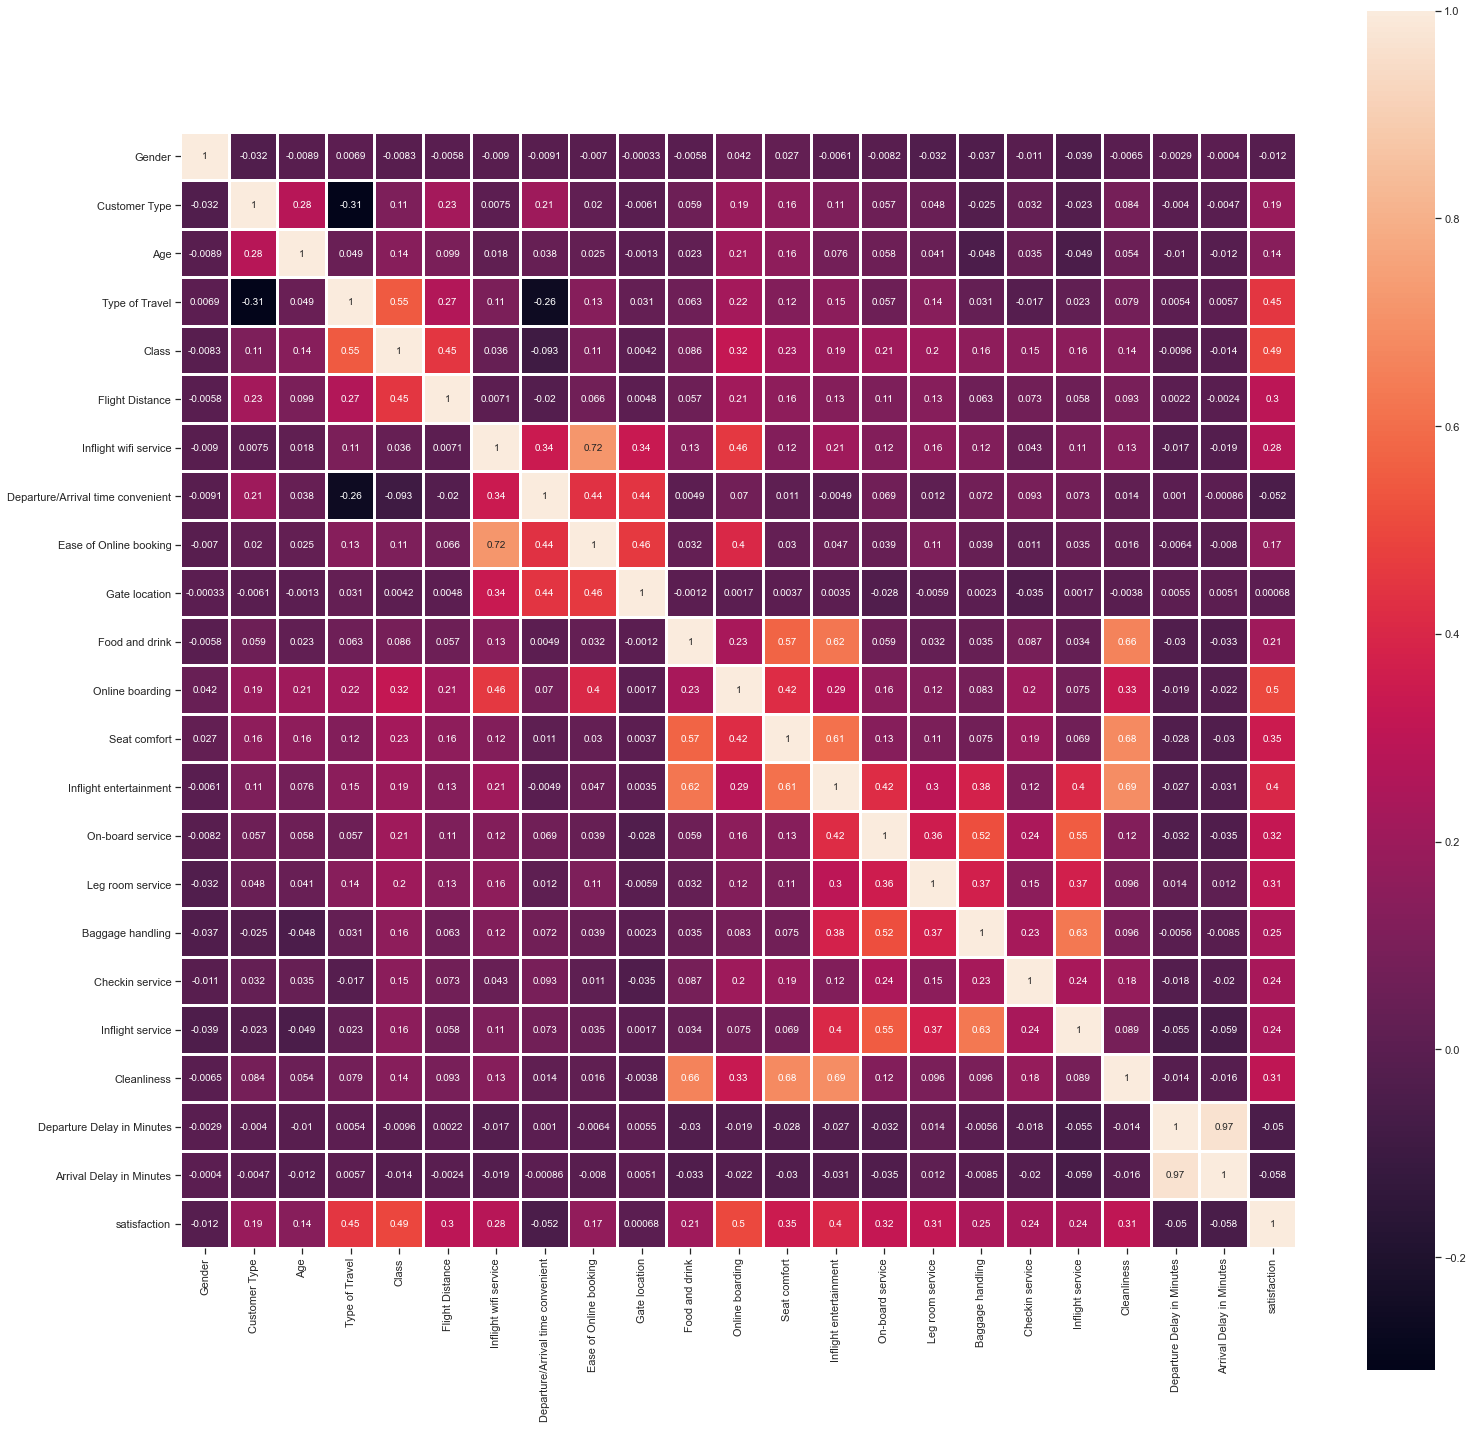

In [180]:
plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(), annot=True, square=True, linewidths=2)

Maak een Scatter matrix met Age, Flight Distance, Departure Delay en Arrival Delay

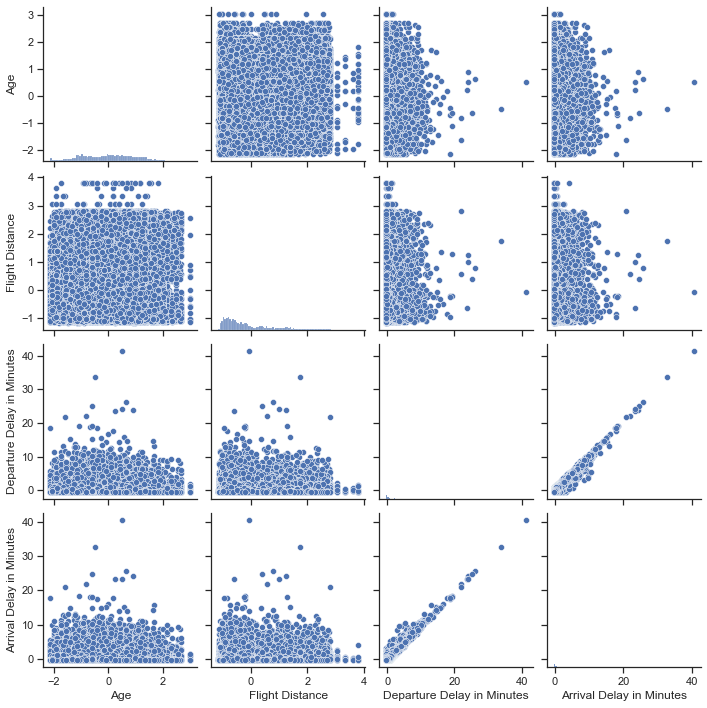

In [181]:
sns.set_theme(style="ticks")
sns.pairplot(box_set)

2. Voorspel arrival delay aan de hand van flight distance

In [185]:
box_set.dropna(inplace=True)
label = box_set['Arrival Delay in Minutes']
features = box_set[['Departure Delay in Minutes']]
print(features)
data_train, data_test, label_train, label_test = train_test_split(features, label, test_size=0.2,random_state=5)

lreg = LinearRegression()
lreg.fit(data_train, label_train)
lreg_pred = lreg.predict(data_test)
r2 = r2_score(label_test, lreg_pred)
print(f"r2 score of this model is {r2}")


        Departure Delay in Minutes
0                         0.266393
1                        -0.361375
2                        -0.387532
3                        -0.099805
4                        -0.387532
...                            ...
103899                   -0.309061
103900                   -0.387532
103901                   -0.204433
103902                   -0.387532
103903                   -0.387532

[103594 rows x 1 columns]
r2 score of this model is 0.9361296959915384


3. Voorspel arrival delay aan de hand van flight distance, leeftijd en
departure delay

In [186]:
box_set.dropna(inplace=True)
label = box_set['Arrival Delay in Minutes']
features = box_set[['Age', 'Flight Distance', 'Departure Delay in Minutes']]
print(features)
data_train, data_test, label_train, label_test = train_test_split(features, label, test_size=0.2,random_state=5)

lreg = LinearRegression()
lreg.fit(data_train, label_train)
lreg_pred = lreg.predict(data_test)
r2 = r2_score(label_test, lreg_pred)
print(f"r2 score of this model is {r2}")


             Age  Flight Distance  Departure Delay in Minutes
0      -1.745279        -0.731539                    0.266393
1      -0.951360        -0.957184                   -0.361375
2      -0.885200        -0.047584                   -0.387532
3      -0.951360        -0.629246                   -0.099805
4       1.430397        -0.978244                   -0.387532
...          ...              ...                         ...
103899 -1.083680        -1.000307                   -0.309061
103900  0.636478         1.160869                   -0.387532
103901 -0.620561         0.807860                   -0.204433
103902 -1.149840        -0.189991                   -0.387532
103903 -0.819040         0.535081                   -0.387532

[103594 rows x 3 columns]
r2 score of this model is 0.9361629922565936
